Note: Commenting out plots for now just to avoid potential memory issues when running all the code together

# Issues with current version of notebook
    1. Correlation heatmaps are cut off on top and bottom

# Import Dependencies

I think that ```%matplotlib inline ``` is just particularly useful for jupyter notebook.

In [1]:
%matplotlib inline 

Start Python Imports

In [2]:
import math, time, random, datetime

Data Manipulation

In [3]:
import numpy as np
import pandas as pd
import re

Visualization

In [4]:
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

Preprocessing

In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler

Machine learning

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, recall_score, roc_auc_score, precision_score, r2_score, f1_score, log_loss
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

Let's be rebels and ignore warnings for now

In [7]:
import warnings
warnings.filterwarnings('ignore')

Statistics

In [8]:
from statistics import mode
import scipy.stats as stats

In [9]:
from Functions import * # Functions is a .py file in current working dir

# Exploratory Data Analysis (EDA)

In [10]:
df_train = pd.read_csv("train.csv")  # in current working dir
df_test = pd.read_csv("test.csv")

Setting display options for functions like ```head()```

In [11]:
pd.set_option('display.width', 400)
pd.set_option('display.max_columns', len(df_train.columns))

In [12]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Roebling, Mr. Washington Augustus II",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Points to note:
    1. missing ages need to be dealt with
    2. 75% under 38 years of age
    3. 75% paid under 31 pounds, whereas the max is 512 pounds

Plot graphic of missing values

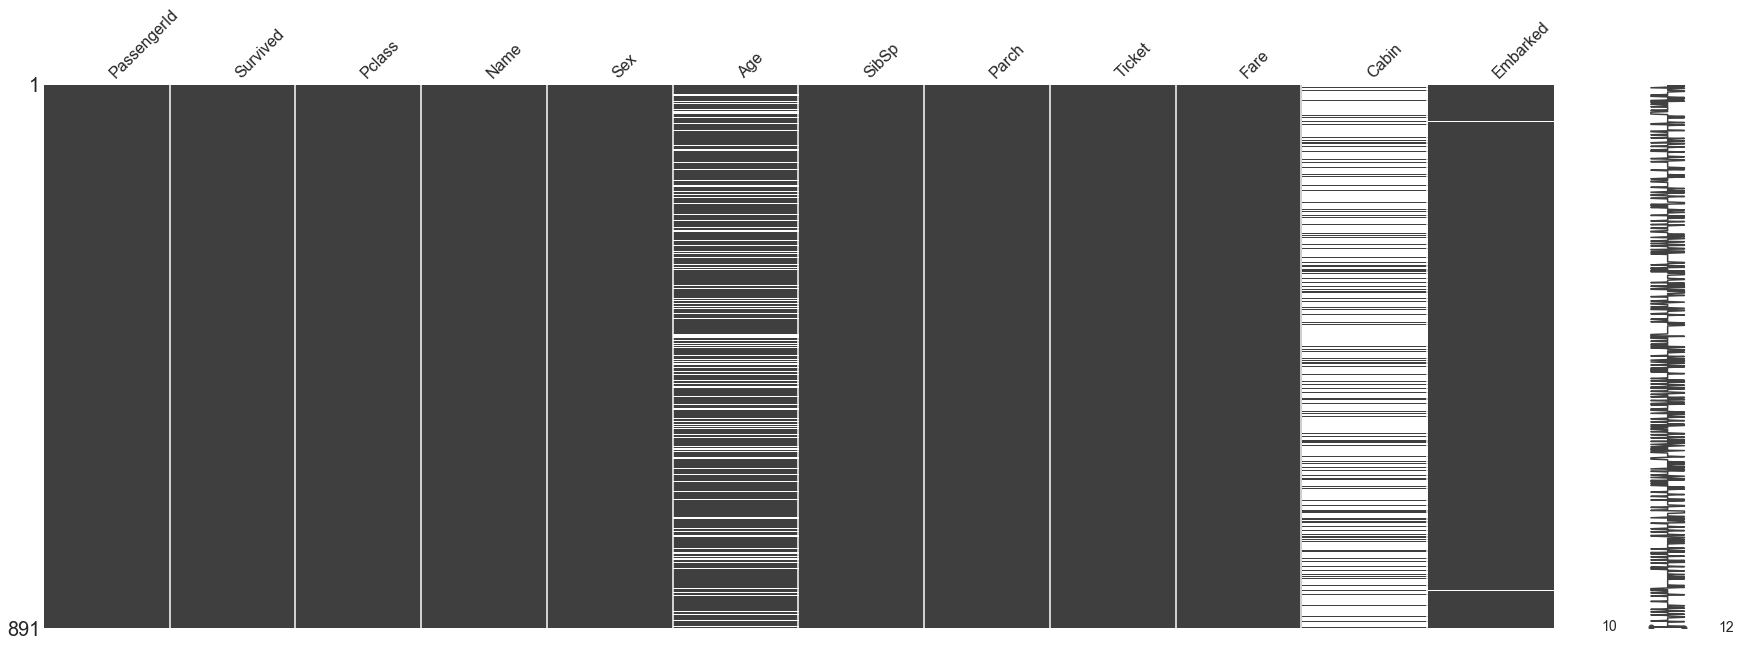

In [14]:
missingno.matrix(df_train, figsize = (30,10))
#df_missing = df_train.columns[df_train.isnull().any()].tolist()
#missingno.heatmap(df_train[df_missing], figsize=(10,10))

Missing Matrix - Points: 
* ```Age``` likely to be important, so will impute data. 
* Very high % of missingness in ```Cabin``` - might be best to remove.
* Numbers on RHS indicate the lowest and highest amounts of data columns filled.
    
Understanding the missing heatmap (if I plot it)

R=1 means that those two vars are always missing at the same time i.e. every row missing var x is also missing var y. Conversely, for R=-1, the two vars are always present together.

Correlation Heatmap

In [15]:
df_train_floats = df_train.loc[:, df_train.dtypes =='float64']
df_train_ints = df_train.loc[:, df_train.dtypes =='int64']
df_train_flints = pd.concat([df_train_floats, df_train_ints], axis=1)
label_encoder = LabelEncoder()
df_train_flints['Sex'] = label_encoder.fit_transform(df_train['Sex'])

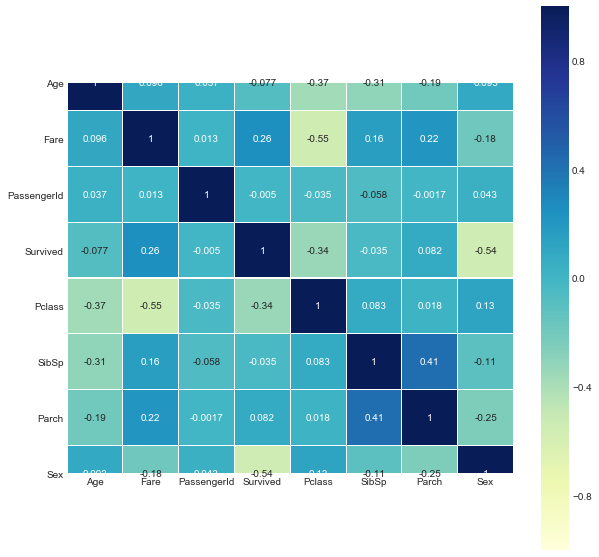

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_train_flints.corr(), square=True, annot=True, linewidths=0.05, cmap='YlGnBu', vmin=-1) 

No strong correlations. 
Note: nans in Age are ignored by corr(), but the rest of the features on the rows are counted which is good!

In [17]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Create two dataframes: one categorical, one contains continuous or binary features.

Thus, I will only put in ```df_train_encode```, features which need to be encoded (one-hot) or label.


In [18]:
df_train_encode = pd.DataFrame()
df_train_keep = pd.DataFrame()

## Exploring features individually

In [19]:
df_train.dtypes # viewing different types of data
df_train.head()  # to see features again

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Target Feature: ```Survived```
Coding: 1 = Survived

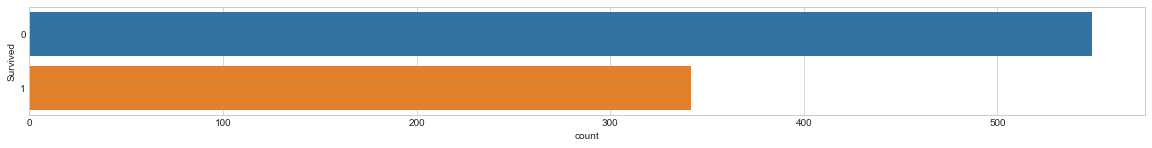

In [20]:
fig = plt.figure(figsize=(20,2))
sns.countplot(y='Survived', data=df_train)

Far more people died. This **class imbalance** might be cause for some concern. Will investigate later e.g. upsampling

In [21]:
df_train_keep['Survived'] = df_train['Survived'] # add `Survived` to df_train_keep

Let's now combine ```Age```, ```Fare``` and ```Survived``` on a single chart.

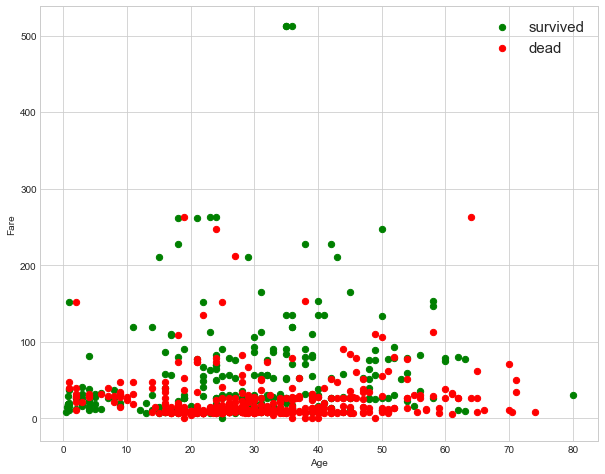

In [22]:
plt.figure(figsize=(10, 8))
ax = plt.subplot()
ax.scatter(df_train[df_train['Survived'] == 1]['Age'], df_train[df_train['Survived'] == 1]['Fare'], c='green', s=40)
ax.scatter(df_train[df_train['Survived'] == 0]['Age'], df_train[df_train['Survived'] == 0]['Fare'], c='red', s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived', 'dead'), scatterpoints=1, loc='upper right', fontsize=15,)

Plot comment: The younger a passenger was and/or more they paid looks to have an impact on survival.

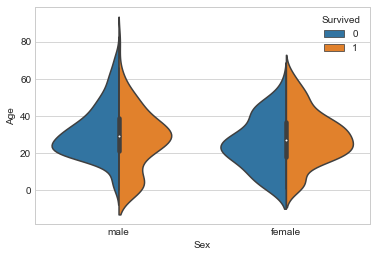

In [23]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, split=True)

### Feature: ```Pclass```

No. of Nulls: 0


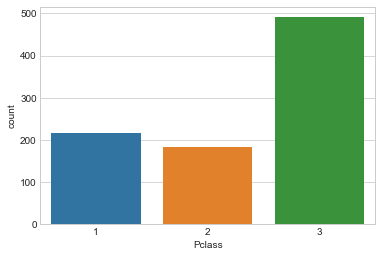

In [24]:
print('No. of Nulls: {}'.format(df_train.Pclass.isnull().sum()))
sns.countplot(df_train.Pclass)

Again, we see class imbalance here: more in Pclass3 ; Approx.Ratio (1:1:2) (Pclass1: Pclass2: Pclass3)

Points to note:
Check for collinearity with e.g. ```Fare```, when fitting regression models later because there looks to be high correlation from the heatmap.

In [25]:
df_train_encode['Pclass'] = df_train['Pclass'] # add `Pclass` to df_train_encode

### Feature: ```Name```

In [26]:
print(len(df_train.Name.value_counts()) == np.unique(df_train.Name).size, "\n")  # TRUE result indicates that all names are unique.

titles_train = get_titles(df_train)
# np.unique(titles)
print(pd.value_counts(titles_train)) # printing frequencies of all unique titles

True 

Mr          518
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Mme           1
Don           1
Capt          1
Ms            1
Jonkheer      1
Sir           1
Lady          1
dtype: int64


In [27]:
#### Investigating 'Jonkheer' as it is an unusual title

In [28]:
df_train.iloc[titles_train.index('Jonkheer')]

PassengerId                                823
Survived                                     0
Pclass                                       1
Name           Reuchlin, Jonkheer. John George
Sex                                       male
Age                                         38
SibSp                                        0
Parch                                        0
Ticket                                   19972
Fare                                         0
Cabin                                      NaN
Embarked                                     S
Name: 822, dtype: object

According to Google this is a nobility title in The Netherlands, so this is fine.

Adding a column with our new variable ```Title```

I will use this later to: 
    1. Impute ages
    2. [Possibly] predict ```Survived``` by this new feature.

In [29]:
df_train_encode['Title'] = titles_train

Feature: ```Sex```

0


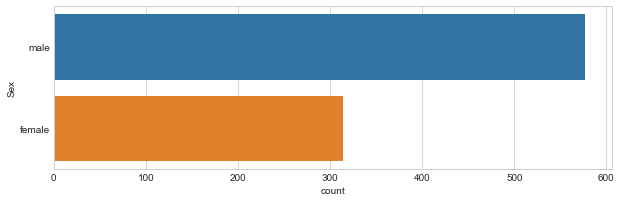

In [30]:
plt.figure(figsize=(10, 3))
sns.countplot(y='Sex', data=df_train)

print(df_train.Sex.isnull().sum())
df_train_encode['Sex'] = df_train['Sex']

### Feature: ```Age```
#------- Working on Age ----#

177


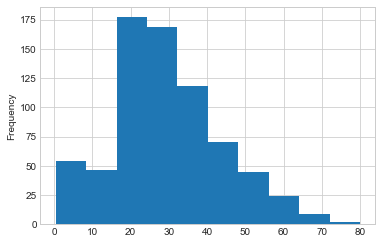

In [31]:
print(df_train.Age.isnull().sum())
df_train.Age.plot.hist()

Comments on Age histogram:
    1. Lot's of people in (0-8,16-40). Very few >60

Look at plots of survived vs perished (two options for plotting given here)

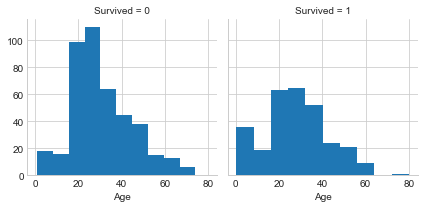

In [32]:
# Option 1: Side by Side
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age')

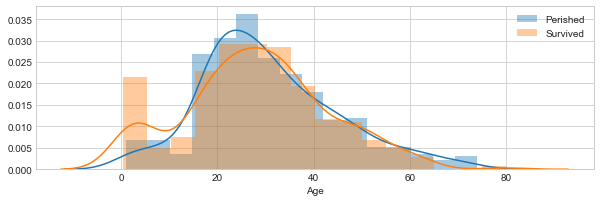

In [33]:
# Option 2: Overlay
df_given_ages = df_train[~np.isnan(df_train.Age)]  # creating df without any nan ages for this plot
df_train_perished = df_given_ages[df_given_ages.Survived == 0]
df_train_survived = df_given_ages[df_given_ages.Survived == 1]
perished_ages = df_train_perished.Age
survived_ages = df_train_survived.Age

plt.figure(figsize=(10, 3))
sns.distplot(perished_ages, label='Perished')
sns.distplot(survived_ages, label='Survived')
plt.legend()

Difference between all and survived gives those who died. Almost 50% of youngest age group survived. Every group except 80+ had more than 50% who died.

In [34]:
df_train_keep['Age'] = df_train['Age'] # adding Age to df_train_keep so that we can loop below

Checking survival rate before imputing. Why? Something to do with comparing after imputing?? I don't know why I looked at this before.

In [35]:
male_surv = len(df_train[df_train.Sex == 'male'])/len(df_train)
female_surv = len(df_train[df_train.Sex == 'female'])/len(df_train)

In [36]:
mean_imputed_ages_train = mean_impute_ages(df_train, df_train_encode, df_train_keep)
print(mean_imputed_ages_train)

(       Mr  Miss   Mrs  Master    Dr   Rev  ...   Don  Capt    Ms  Jonkheer   Sir  Lady
0    22.0  26.0  38.0    2.00  44.0  42.0  ...  40.0  70.0  28.0      38.0  49.0  48.0
1    35.0   4.0  35.0    2.00  54.0  51.0  ...   NaN   NaN   NaN       NaN   NaN   NaN
2     NaN  58.0  27.0    7.00  23.0  54.0  ...   NaN   NaN   NaN       NaN   NaN   NaN
3    54.0  14.0  14.0   11.00  32.0  57.0  ...   NaN   NaN   NaN       NaN   NaN   NaN
4    20.0  15.0  55.0    4.00  50.0  28.0  ...   NaN   NaN   NaN       NaN   NaN   NaN
5    39.0   8.0  31.0     NaN   NaN  27.0  ...   NaN   NaN   NaN       NaN   NaN   NaN
6     NaN   NaN   NaN    0.83  49.0   NaN  ...   NaN   NaN   NaN       NaN   NaN   NaN
7    35.0   NaN  38.0   12.00   NaN   NaN  ...   NaN   NaN   NaN       NaN   NaN   NaN
8    34.0  18.0   NaN     NaN   NaN   NaN  ...   NaN   NaN   NaN       NaN   NaN   NaN
9    28.0  14.0  40.0    1.00   NaN   NaN  ...   NaN   NaN   NaN       NaN   NaN   NaN
10    NaN   3.0  27.0    9.00   NaN   NaN 

In [37]:
# ad-hoc not included in fn
df_real_ages_train = mean_imputed_ages_train[0]  # will need to edit names of df_real_Ages and df_ages to include '_train' below
df_ages_train = mean_imputed_ages_train[1]

Note: at this point, df_ages contains the ages(after imputing using mean by title) split by each title (column)

Removing titles from df_train_encode before one-hot-encoding them as I have already used them for imputing age and I want to keep things simple(so not using them in modelling for now).

In [38]:
df_train_encode.drop(['Title'], axis=1, inplace=True)

I can plot histograms or distribution plots of each column separately by first removing nans.
In the next cell, I make a function plotting these overlaying distribution plots.

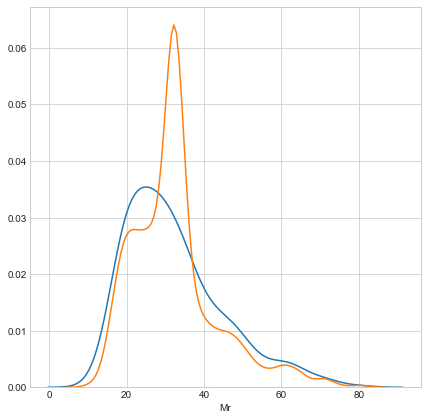

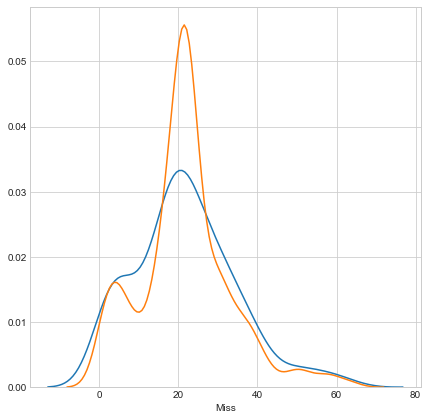

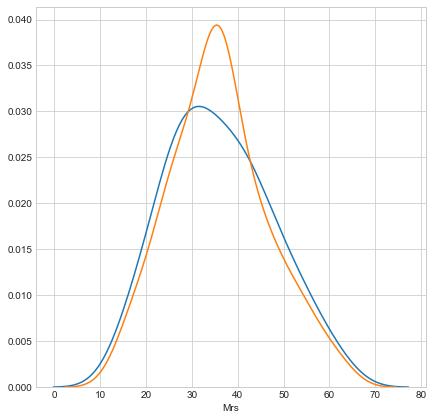

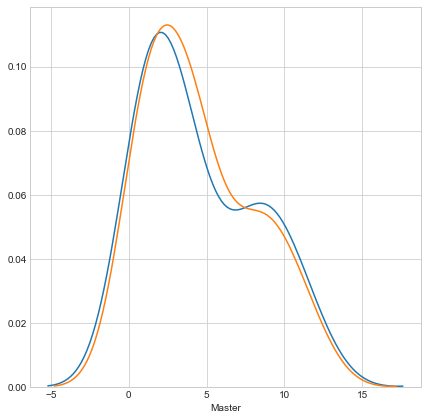

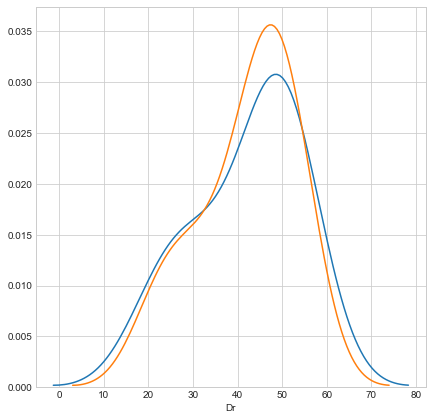

In [39]:
for i in df_ages_train.columns: 
    # if statement below to only plot if there are actual nans for ages in given title i
    if(df_real_ages_train[i][~np.isnan(df_real_ages_train[i])].equals(df_real_ages_train[i].iloc[0:len(df_real_ages_train[i][~np.isnan(df_real_ages_train[i])])]) == False): # using iloc so that we only look at the necessary elements in df_real_ages, as this also has nans to fill to the end of each column
        plt.figure(figsize=(7, 7))
        sns.distplot(df_real_ages_train[i][~np.isnan(df_real_ages_train[i])], hist=False)  # plotting distn (w/o hist) of real given ages w/o nans
        sns.distplot(df_ages_train[i][~np.isnan(df_ages_train[i])], hist=False)  # overlaying distn ages w/  imputed nans (imputed using means in this case)
        plt.legend(['real', 'imputed'])
# imputing with mean leads to a huge spike at the mean when there is a high % of nans in a title...obviously!
# I also tried fitting vars from a normal distn with mean(title[i]), sd(title[i]) but this yields negative ages, similarly log normal gives huge positive ages

Exploring imputation using likelihood functions

In [40]:
def AssessLikelihoodAges(distfn): # only working for beta right now
    # Assess likelihood fn for ages using plots and K-S test
    plt.figure(figsize=(8, 5))
    plt.title(distfn)
    sns.distplot(df_given_ages.Age, hist=False, label='real ages')  # plotting real ages

    # Likelihood fn
    dist = distfn  # setting distribution
    if distfn == stats.beta or distfn == stats.gamma or distfn == stats.betaprime or distfn == stats.lognorm \
            or distfn == stats.chi2 or distfn == stats.exponweib:
        params = distfn.fit(df_given_ages.Age, floc=0)  # likelihood fn to find params, floc=0 forces loc=0 for certain distributions, whereas if I gave loc=0 instead, 0 would be the starting point for loc, but it would be allowed to stray from 0
    else:
        params = dist.fit(df_given_ages.Age)  # likelihood fn to find params
    dist_vars = distfn.rvs(*params, size=df_train.Age.isnull().sum())  # generating [size] vars from a distfn distn using the above params
    sns.distplot(dist_vars, hist=True, label='imputed ages')  # overlaying imputed values on the real ages
    plt.legend()  # ensures labels show up
    ks = stats.kstest(df_given_ages.Age, distfn.cdf, params)
    # kolmogorov-smirnov testing how close this beta distn is to the actual dist of given ages
    # H0: there is no difference in the distributions. p value < 0.05 means we reject H0 and thus this beta distn is not a good fit
    val = 'minimum = %(min)f' % {"min": dist_vars.min()}
    return ks, val

(KstestResult(statistic=0.09722500739182788, pvalue=2.511608736982588e-06),
 'minimum = 1.231779')

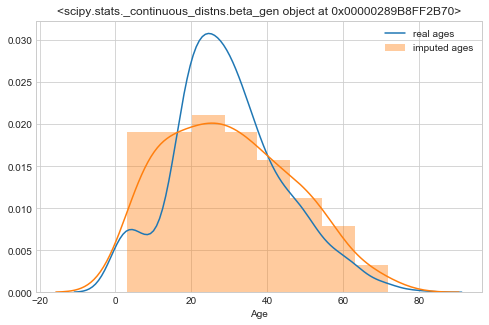

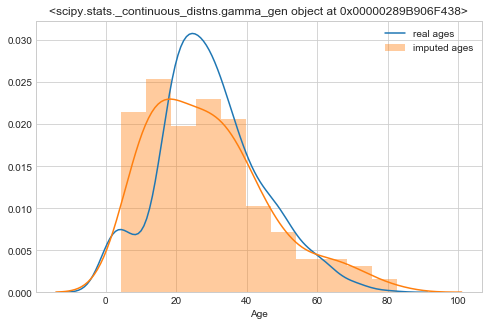

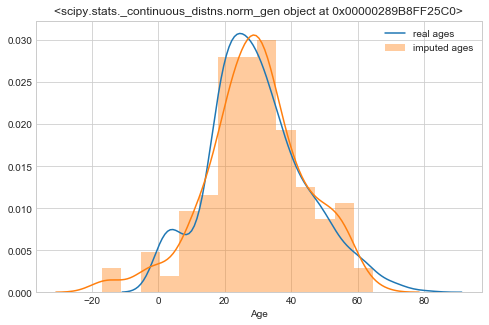

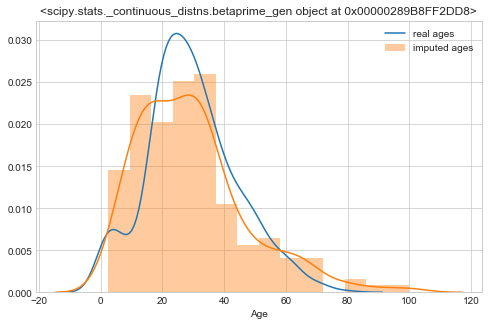

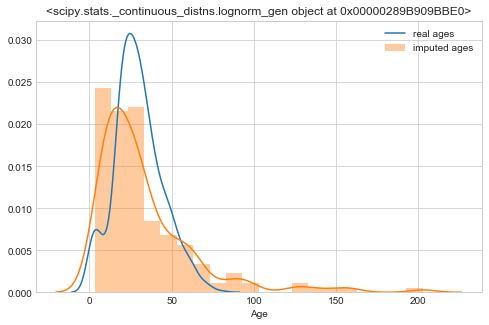

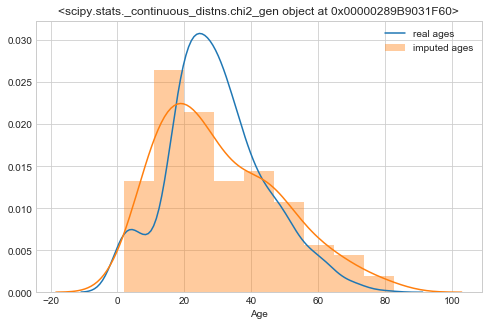

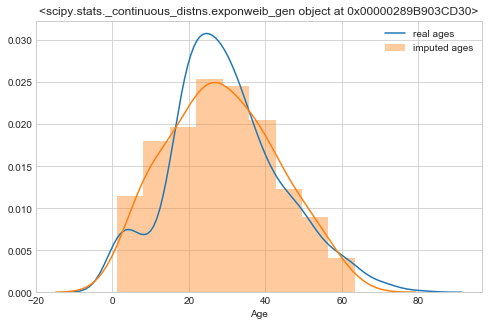

In [41]:
AssessLikelihoodAges(stats.beta)
AssessLikelihoodAges(stats.gamma)
AssessLikelihoodAges(stats.norm)
AssessLikelihoodAges(stats.betaprime)
AssessLikelihoodAges(stats.lognorm)
AssessLikelihoodAges(stats.chi2)
AssessLikelihoodAges(stats.exponweib)

Weibull's (exponweib) pdf is bounded by 0 but it is not a suitable distn because of the long tail

PROBLEM: NONE OF THE ABOVE ARE GOOD FITS


# NOT SUITABLE: Attempted to take the ln of given ages, fit a normal and then exp the imputed ages (which were imputed using the normal)<br>
# Gives huge positive ages so not suitable (fat tailed)<br>
def AssessLikelihoodLnAges(distfn): # only working for beta right now<br>
    # Assess likelihood fn for ln(ages) using plots and K-S test<br>
    plt.figure(figsize=(8, 5))<br>
    plt.title(distfn)<br>
    sns.distplot(np.log(df_given_ages.Age), hist=False, label='ln(real ages)')  # plotting real ages<br>
    # Likelihood fn<br>
    dist = distfn  # setting distribution<br>
    params = dist.fit(np.log(df_given_ages.Age))  # likelihood fn to find params<br>
    dist_vars = distfn.rvs(*params, size=df_train.Age.isnull().sum())  # generating [size] vars from a distfn distn using the above params<br>
    sns.distplot(dist_vars, hist=True, label='imputed ages using ln')  # overlaying imputed values on the ln of the real ages<br>
    plt.legend()  # ensures labels show up<br>
    ks = stats.kstest(np.log(df_given_ages.Age), distfn.cdf, params)<br>
    # kolmogorov-smirnov testing how close this beta distn is to the actual dist of given ages<br>
    # H0: there is no difference in the distributions. p value < 0.05 means we reject H0 and thus this beta distn is not a good fit<br>
    val = 'minimum = %(min)f' % {"min": dist_vars.min()}<br>
    return ks, val, dist_vars<br>
ln_ages_output = AssessLikelihoodLnAges(stats.norm)<br>
ln_ages = ln_ages_output[2] # seems like a good fit but gives huge positive ages, see below plots<br>
sns.distplot(df_given_ages.Age, label='real ages')<br>
s.distplot(np.exp(ln_ages), label='from logged ages')
  # Playing with logging ages, NOT A VIABLE OPTION DUE TO FAT TAILS

Follow Up TODO/QUESTIONS:
1) Write my own likelihood fn<br>
2) Do I truncate/force every pdf above 0 like with beta(floc=0)?

#### Feature: ```SibSp```

Comment: Adding to ```df_train_keep``` as is.

In [42]:
df_train_keep['SibSp'] = df_train['SibSp']

Worth thinking about: Some of the 0's (zeros) could be nan's as there are no nans and I assume 0 is default.

#### Feature: ```Parch```

Comment: Adding to ```df_train_keep``` as is.

In [43]:
df_train_keep['Parch'] = df_train['Parch']

Worth thinking about: As with ```SibSp```, some of the 0's (zeros) could be nan's as there are no nans and I assume 0 is default.

#### Feature: ```Ticket```

Comment: Leaving out for now due to complexity of structure. No discernible pattern in ticket derivation.

#### Feature: ```Fare```

Comment: Adding this to ```df_train_keep``` as is.

In [44]:
df_train_keep['Fare'] = df_train['Fare']

#### Feature: ```Cabin```

Comment: Leaving out for now due to large % of missingness.

Feature: ```Embarked```

Comment: Adding Embarked to see if it is of use. Will edit the two nans within ```df_train_encode```.

In [45]:
df_train_encode['Embarked'] = df_train['Embarked']

Find the indices where Embarked is ```nan```.

I googled the history of the Titanic for some external info on the passengers here.

In [46]:
print(df_train[df_train.Embarked.isnull()].index)

df_train_encode.Embarked.iloc[61] = 'S'  # https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html
df_train_encode.Embarked.iloc[829] = 'S'  # https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

print(df_train_encode.Embarked.isnull().sum())  # no nans left now

Int64Index([61, 829], dtype='int64')
0


At this point, we have ```df_train_keep``` and ```df_train_encode``` completed.

Now, we need to one-hot-encode all our ```df_train_encode``` columns and I have decided to standardise ```df_train_keep```.

### Standardisation of ```df_train_keep```

In [47]:
df_train_keep_stand = df_train_keep.iloc[:, 1:]
scaler = StandardScaler()  # Standardisation
for i in df_train_keep_stand.columns:
    df_train_keep_stand[[i]] = scaler.fit_transform(df_train_keep_stand[[i]])

Note now, each column is standardised. When we break the columns up into different dummy vars (one-hot-encoding) do not expect the z-scores in each dummy var to range between -3,3 because it's only across the total original column that you expect that.

I'm going to use this standardised dataframe, ```df_train_keep_stand``` going forward.

### One-Hot-Encoding

In [48]:
one_hot_cols = df_train_encode.columns.tolist()
df_train_encoded = pd.get_dummies(df_train_encode, columns=one_hot_cols, drop_first=True)

Dropping dummy var for each variable even though (I think) this is only required for Linear Regression because it tries to invert our design matrix ```X```. 

Combining datasets

In [49]:
df_train_combined = pd.concat([pd.DataFrame(df_train_keep['Survived']), df_train_keep_stand, df_train_encoded], axis=1)

X_train = df_train_combined.iloc[:, 1:]
y_train = df_train_combined.iloc[:, 0]

Almost ready to go for modelling - just need to make test match up with train data

In [50]:
### Creating the training sets and holding out a pseudo test set to use after folding but before real test set. We use the pseudo test set to get metrics
pseudo_test_size = 100
df_train_combined_cropped = df_train_combined.iloc[0:df_train_combined.shape[0]-pseudo_test_size, :]  # this will be passed to cross_fold_val in place of Xy_train. Note: # X_train = df_train_combined_cropped + (X_pseudo_test + y_pseudo_test)
X_train_cropped = df_train_combined.drop('Survived', axis=1).iloc[0:df_train_combined.shape[0]-pseudo_test_size, :]
y_train_cropped = df_train_combined['Survived'][0:df_train_combined.shape[0]-pseudo_test_size]  # iloc doesn't work as this is a series (one dimension I think)


In [51]:
X_pseudo_test = df_train_combined.drop('Survived', axis=1).iloc[df_train_combined.shape[0]-pseudo_test_size:df_train_combined.shape[0], :]
y_pseudo_test = df_train_combined['Survived'][df_train_combined.shape[0]-pseudo_test_size:df_train_combined.shape[0]]


Resetting indices to ensure they start at 0. This makes looping with ```i``` far easier for when I want to use ```predict.proba()``` later.

In [52]:
X_pseudo_test.reset_index(drop=True, inplace=True)
y_pseudo_test.reset_index(drop=True, inplace=True)

Note: Join X_train_cropped and X_pseudo_test to get back whole X_train, with length as per train.csv. Similar for y_train

## Create necessary df_test_.. dataframes with features as we did for training data

Create df_test_keep and df_test_encode

In [77]:
df_test_keep = pd.DataFrame()
df_test_encode = pd.DataFrame()

#### (Test) Feature: ```Pclass```

In [78]:
print('No.of Nulls: {}'.format(df_test.Pclass.isnull().sum()))  # no nulls to worry about
# df_test_encode['Pclass'] = df_test['Pclass']

# putting check in place in case the unseen test set supplied by kaggle is doing anything funny
df_test_encode['Pclass'] = df_test['Pclass']
      
mu3 = np.mean(df_train.Fare[df_train.Pclass == 3]) # mu3, mu2 and mu1 will be used later when imputing Fare (in test)
mu2 = np.mean(df_train.Fare[df_train.Pclass == 2])
mu1 = np.mean(df_train.Fare[df_train.Pclass == 1])
if df_test_encode.Pclass.isnull().sum():
    impute_Pclass(df_train, df_test, df_test_encode, mu3, mu2, mu1)  

No.of Nulls: 0


Using ```df_train``` to avoid confusion as it is the most basic dataset that I have and it contains the actual ```Fare``` and ```Pclass``` values, not standardised/encoded versions.

#### (Test) Name(Title)

Using titles as in train set up

In [79]:
titles_test = get_titles(df_test) # this function checks for nulls
df_test_encode['Title'] = titles_test

#### (Test) Feature: ```Sex```

In [80]:
df_test_encode['Sex'] = df_test['Sex']
if df_test['Sex'].isnull().sum():  # only need to impute if there are nulls in df_test.Sex
    impute_Sex(df_train, df_test, df_test_encode, titles_train, titles_test)

#### (Test) Feature: ```Age```

In [81]:
# Do we HAVE to follow exact same imputation technique as in test? I assume so...
df_test_keep['Age'] = df_test['Age'] # adding Age to df_test_keep so that we can loop below in fn
if df_test.Age.isnull().sum():  # this appears to be equivalent to writing "if df_test.Age.isnull().sum() > 0:"
    mean_imputed_ages_test = mean_impute_ages(df_test, df_test_encode, df_test_keep)
    df_real_ages_test = mean_imputed_ages_test[0] # pulling these out as may want to access these values for plotting etc later
    df_ages_test = mean_imputed_ages_test[1]
# note: now df_test_keep.Age.isnull().sum() = 0 and df_test.Age.isnull().sum() is still 86. This is not a problem as we move forward with df_test_keep

Remove ```Title```

Now that I have used titles to impute age, I will remove titles from ```df_test_encode``` to keep things simple for now (i.e. just remove titles altogether)

In [82]:
df_test_encode.drop(['Title'], axis=1, inplace=True)

#### (Test) Feature: SibSp

I will use the mode to impute because the mode always exists in train set, and we should only impute using data from train set anyway.

In [83]:
df_test_keep['SibSp'] = df_test['SibSp']
if df_test_keep.SibSp.isnull().sum():
    df_test_keep.SibSp[df_test_keep.SibSp.isnull()] = mode(df_train.SibSp)  

#### (Test) Feature: Parch

In [84]:
df_test_keep['Parch'] = df_test['Parch']
if df_test_keep.Parch.isnull().sum():
    df_test_keep.Parch[df_test_keep.Parch.isnull()] = mode(df_train.Parch)

#### (Test) Feature: Fare

In [85]:
mu_dict = {1:mu1, 2:mu2, 3:mu3} # dictionary of mu's which are mean fares for each Pclass from df_train
df_test_keep['Fare'] = df_test.Fare
if df_test_keep.Fare.isnull().sum():
    impute_Fare(df_test_keep, df_test_encode, mu_dict)
# df_test_keep.Fare.nlargest(10)  # huge standard deviations
# df_test_keep.Fare.nsmallest(10)

#### (Test) Feature: Embarked

In [86]:
df_test.Embarked.isnull().sum()
df_test_encode['Embarked'] = df_test.Embarked
if df_test_encode.Embarked.isnull().sum():
    df_test_encode.Embarked[df_test_encode.Embarked.isnull()] = mode(df_train.Embarked)

### Standardisation (Test)

In [87]:
df_test_keep_stand = df_test_keep  # standardising entire df_test_keep no need to iloc here because there is no Survived column in df_test_keep
for i in df_train_keep_stand.columns:
    df_test_keep_stand[[i]] = scaler.fit_transform(df_test_keep_stand[[i]])

### One-Hot-Encoding Test

In [88]:
one_hot_cols_test = df_test_encode.columns.tolist()
df_test_encoded = pd.get_dummies(df_test_encode, columns=one_hot_cols_test, drop_first=True)

combining datasets

In [89]:
df_test_combined = pd.concat([df_test_keep_stand, df_test_encoded], axis=1)  

Note: df_test_combined isn't actually used, just following same format as training in case I want to edit combined going forward.

Create X_test

In [90]:
X_test = df_test_combined

Check to make sure there are no nulls in X_test and ringing a bell if there are any nans

In [91]:
bell_for_nans(X_test)
# If you need specifics run X_test.isnull().sum() and then e.g. X_test[X_test.Fare.isnull()]

### Modelling (Or at least prep for modelling)

In [92]:
### Get our folds before defining any algo
build_folds = get_folds(3, df_train_combined_cropped)  # this is the first time that we define how many folds K that we want
K = build_folds[0]
df_folds = build_folds[1]

In [93]:
### Defining algos
algo_list_dict = {}

In [94]:
### Algo1 =  LR()
algo = LogisticRegression()  # basic algo defined
algo_list_dict[algo] = ''

#### GridSearch

GridSearch to tune hyperparameters. We then pass those hyperparams through to the algo in ```cross_fold_val()``` which may be overkill but it's the only way to use ```cross_fold_val()``` and hyperparams together.

In [95]:
### Algo2 = LR(grid searched params)
algo, grid_values = LogisticRegression, {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}  # https://stackoverflow.com/questions/31417487/sklearn-logisticregression-and-changing-the-default-threshold-for-classification

model = GridSearchCV(algo(), param_grid=grid_values)
clf = model.fit(X_train_cropped, y_train_cropped)  # need to fit the model in order to get best_params_ which we then pass to cross_fold_val via algo
# clf.best_params_, clf.cv_results_, clf.best_score_, clf.best_estimator_

algo = algo(**clf.best_params_)
algo_list_dict[algo] = ''

In [96]:
### Algo3 = LR(threshold)
algo = LogisticRegression()
algo_list_dict[algo] = 'threshold'  # note, this is being fit on pseudo_test, not train

In [97]:
### Algo4 = Decision Tree
algo = DecisionTreeClassifier()
algo_list_dict[algo] = ''

In [98]:
### Algo5 = Random Forest
algo = RandomForestClassifier()
algo_list_dict[algo] = ''
## below lines can be run only after fitting RF
'''features_RF = pd.DataFrame(algo.feature_importances_, columns=['Feature_Importance'],index=X_train.columns)
features_RF.sort_values(by=['Feature_Importance'], ascending=False, inplace=True)
print(features_RF)'''

"features_RF = pd.DataFrame(algo.feature_importances_, columns=['Feature_Importance'],index=X_train.columns)\nfeatures_RF.sort_values(by=['Feature_Importance'], ascending=False, inplace=True)\nprint(features_RF)"

In [99]:
### Algo6 = SVM
algo = SVC(probability=True)
algo_list_dict[algo] = ''

In [100]:
### Algo7 = SGD
algo = SGDClassifier(loss='log')
algo_list_dict[algo] = ''

In [101]:
### Algo8 = XGB
algo = xgb.XGBClassifier()
algo_list_dict[algo] = ''

In [102]:
### Defining results_table (aka output) size
output_train = pd.DataFrame(np.empty([int(len(algo_list_dict)-len(list(algo_list_dict.items())[algo_list_dict.values() == 'threshold'])/2), 10]) * pd.np.nan).astype(object)  # this gets updated within algo_fit_output
output_train.columns = ['model', 'acc', 'prec', 'sens', 'spec', 'f1', 'loss', 'run time', 'AUC', 'selected params' ]
output_pseudo = pd.DataFrame(np.empty([int(len(list(algo_list_dict.items())[algo_list_dict.values() == 'threshold'])/2), 10]) * pd.np.nan).astype(object)
output_pseudo.columns = output_train.columns

In [103]:
### Fitting algos to get a table of results called output
j = l = 0
for i in range(len(algo_list_dict)):
    result = algo_fit_output(algo_list_dict, K, df_folds, output_train, output_pseudo, i, j, l, X_pseudo_test, y_pseudo_test)  # no need to define anything for now, because output is updated within the function
    j, l = result[2], result[3]
output = pd.concat([output_train, output_pseudo], axis=0, ignore_index=True)

In [104]:
max_index = output.acc.astype('float').idxmax()  # index of max accuracy, use this to find best algo
best_algo = output.iloc[max_index,0]

In [105]:
### Final Answer
best_algo = xgb.XGBClassifier()
best_algo.fit(X_train, y_train)
final_test_predictions = pd.DataFrame(best_algo.predict(X_test))

In [107]:
display(output)

# print(final_test_predictions)

,model,acc,prec,sens,spec,f1,loss,run time,AUC,selected params
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.80303,0.781955,0.679739,0.880658,0.727273,"[0.4604910205320371, 0.4360453541092232, 0.457...",0.00426014,0.854657,"[{'C': 1.0, 'class_weight': None, 'dual': Fals..."
1,"LogisticRegression(C=1, class_weight=None, dua...",0.80303,0.781955,0.679739,0.880658,0.727273,"[0.4604910205320371, 0.4360453541092232, 0.457...",0.00397309,0.854657,"[{'C': 1, 'class_weight': None, 'dual': False,..."
2,"DecisionTreeClassifier(class_weight=None, crit...",0.757576,0.682692,0.696078,0.796296,0.68932,"[8.53810668380288, 6.941897640860389, 7.740003...",0.137613,0.753816,"[{'class_weight': None, 'criterion': 'gini', '..."
3,"(DecisionTreeClassifier(class_weight=None, cri...",0.791667,0.754513,0.683007,0.860082,0.716981,"[1.2041336086431955, 2.3925490492642116, 1.656...",0.011981,0.833954,"[{'bootstrap': True, 'class_weight': None, 'cr..."
4,"SVC(C=1.0, cache_size=200, class_weight=None, ...",0.819444,0.798535,0.712418,0.886831,0.753022,"[0.4487279882363584, 0.43609927558978534, 0.48...",0.0395898,0.829237,"[{'C': 1.0, 'cache_size': 200, 'class_weight':..."
5,"SGDClassifier(alpha=0.0001, average=False, cla...",0.789141,0.750903,0.679739,0.858025,0.713551,"[0.477018634401769, 0.5764589085750903, 0.6670...",0.00863163,0.829958,"[{'alpha': 0.0001, 'average': False, 'class_we..."
6,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.82197,0.8,0.718954,0.886831,0.757315,"[0.42768419206593977, 0.40519960960867163, 0.4...",0.0668071,0.860637,"[{'base_score': 0.5, 'booster': 'gbtree', 'col..."
7,"LogisticRegression(C=1.0, class_weight=None, d...",0.82,0.764706,0.722222,0.875,0.742857,6.21704,NaN,0.860243,"[{'C': 1.0, 'class_weight': None, 'dual': Fals..."


Link for TPR, FPR, TNR, FNR etc: https://stats.stackexchange.com/questions/109701/what-is-the-false-discovery-rate-curve

TODO
* Balance classes from getgo in data
* Produce a similar output table for train - also use a validation set perhaps?
* Plot comparisons of metrics between train and test
* Build on from TPR v FPR..other metrics etc.
